#### Задание (2/2)
- [x] Найти в открытых источниках или составить самостоятельно таблицу среднего дохода (PPP) в зависимости от страны
- [x] Построить график корреляции между средним доходом (PPP) и ценой подписки 

#### Вопросы (6/7)
- [x] Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны.
- [x] Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента
- [x] Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?
- [ ] Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?
- [x] Какой процент среднего дохода россиянина будет составлять подписка Netflix?
- [x] На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)
- [x] В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?

#### Ограничения (5/5)
- [x] Данные, используемые в ноутбуке с решением, должны подтягиваться через url c удаленного источника (википедии, google sheets, etc)
- [x] Нельзя использовать циклы for, while для работы с данными. Используйте инструменты Pandas
- [x] Должны присутствовать методы df.apply, pd.merge, pd.concat
- [x] В приведенной статье есть готовые выводы, их нельзя использовать.
- [x] Решение оформить в виде репозитория на github.com


In [1]:
import pandas as pd
from matplotlib import pyplot as plt

# 1. Предобработка данных

In [2]:
# подписки
df_subscriptions = pd.read_csv('https://raw.githubusercontent.com/ruslan1007/AAA/main/Pandas%20Workshop/Netflix%20subscription%20fee%20Dec-2021.csv')

# доходы по странам
df_income = pd.read_csv('https://raw.githubusercontent.com/ruslan1007/AAA/main/Pandas%20Workshop/Median%20Income%20by%20Country%202021.csv',
                    usecols=['country', 'meanIncome'])

# континент по коду страны
df_continents = pd.read_csv('https://raw.githubusercontent.com/ruslan1007/AAA/main/Pandas%20Workshop/countryContinent.csv',
                     usecols = ['code_2', 'continent'])

In [3]:
df_continents.head()

,code_2,continent
0,AF,Asia
1,AX,Europe
2,AL,Europe
3,DZ,Africa
4,AS,Oceania


In [4]:
df_continents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   code_2     248 non-null    object
 1   continent  240 non-null    object
dtypes: object(2)
memory usage: 4.0+ KB


Добавим новый столбец, преобразовав код каждой страны к нижнему регистру

In [5]:
df_continents['code'] = df_continents['code_2'].str.lower()

In [6]:
df_subscriptions.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26
1,au,Australia,6114,4050,2064,7.84,12.12,16.39
2,at,Austria,5640,3779,1861,9.03,14.67,20.32
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99


In [7]:
df_subscriptions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country_code                   65 non-null     object 
 1   Country                        65 non-null     object 
 2   Total Library Size             65 non-null     int64  
 3   No. of TV Shows                65 non-null     int64  
 4   No. of Movies                  65 non-null     int64  
 5   Cost Per Month - Basic ($)     65 non-null     float64
 6   Cost Per Month - Standard ($)  65 non-null     float64
 7   Cost Per Month - Premium ($)   65 non-null     float64
dtypes: float64(3), int64(3), object(2)
memory usage: 4.2+ KB


In [8]:
df_income.head()

,country,meanIncome
0,Luxembourg,31376
1,United Arab Emirates,27017
2,Norway,25272
3,Switzerland,25787
4,United States,25332


In [9]:
df_income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162 entries, 0 to 161
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   country     162 non-null    object
 1   meanIncome  162 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.7+ KB


Добавим столбец со среднемесячным доходом

In [10]:
df_income['month_income'] = df_income['meanIncome'] / 12

In [11]:
df_income.head()

,country,meanIncome,month_income
0,Luxembourg,31376,2614.666667
1,United Arab Emirates,27017,2251.416667
2,Norway,25272,2106.000000
3,Switzerland,25787,2148.916667
4,United States,25332,2111.000000


Приступим к формированию итогового датафрейма

In [12]:
df_merged = df_subscriptions.merge(df_continents, 
                              how='left', 
                              left_on='Country_code', 
                              right_on = 'code')

In [13]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 64
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country_code                   65 non-null     object 
 1   Country                        65 non-null     object 
 2   Total Library Size             65 non-null     int64  
 3   No. of TV Shows                65 non-null     int64  
 4   No. of Movies                  65 non-null     int64  
 5   Cost Per Month - Basic ($)     65 non-null     float64
 6   Cost Per Month - Standard ($)  65 non-null     float64
 7   Cost Per Month - Premium ($)   65 non-null     float64
 8   code_2                         65 non-null     object 
 9   continent                      65 non-null     object 
 10  code                           65 non-null     object 
dtypes: float64(3), int64(3), object(5)
memory usage: 6.1+ KB


In [14]:
df_merged.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),code_2,continent,code
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,AR,Americas,ar
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,AU,Oceania,au
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,AT,Europe,at
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,BE,Europe,be
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,BO,Americas,bo


Все данные подтянулись!

In [15]:
df = df_merged.merge(df_income, how='left', left_on='Country', right_on='country')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 64
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country_code                   65 non-null     object 
 1   Country                        65 non-null     object 
 2   Total Library Size             65 non-null     int64  
 3   No. of TV Shows                65 non-null     int64  
 4   No. of Movies                  65 non-null     int64  
 5   Cost Per Month - Basic ($)     65 non-null     float64
 6   Cost Per Month - Standard ($)  65 non-null     float64
 7   Cost Per Month - Premium ($)   65 non-null     float64
 8   code_2                         65 non-null     object 
 9   continent                      65 non-null     object 
 10  code                           65 non-null     object 
 11  country                        56 non-null     object 
 12  meanIncome                     56 non-null     float

Появились пропуски.

In [17]:
df[df['country'].isna()]

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),code_2,continent,code,country,meanIncome,month_income
12,cz,Czechia,7325,5234,2091,8.83,11.49,14.15,CZ,Europe,cz,NaN,NaN,NaN
19,gi,Gibraltar,6167,4079,2088,9.03,14.67,20.32,GI,Europe,gi,NaN,NaN,NaN
23,hk,Hong Kong,4746,2883,1863,8.08,10.00,11.93,HK,Asia,hk,NaN,NaN,NaN
27,id,Indonesia,3887,2449,1438,8.36,10.66,12.96,ID,Asia,id,NaN,NaN,NaN
33,li,Liechtenstein,3048,1712,1336,12.88,20.46,26.96,LI,Europe,li,NaN,NaN,NaN
38,mc,Monaco,5804,3806,1998,9.03,13.54,18.06,MC,Europe,mc,NaN,NaN,NaN
40,nz,New Zealand,6084,4003,2081,8.80,12.53,16.94,NZ,Oceania,nz,NaN,NaN,NaN
49,sm,San Marino,2310,1937,373,9.03,14.67,20.32,SM,Europe,sm,NaN,NaN,NaN
50,sg,Singapore,6303,4109,2194,9.51,12.81,16.11,SG,Asia,sg,NaN,NaN,NaN


Заполним пропуски в __meanIncome__ средним значением на континенте

In [18]:
df.groupby('continent')['month_income'].mean()

continent
Africa       340.083333
Americas     681.567708
Asia         811.916667
Europe      1172.922414
Oceania     1777.416667
Name: month_income, dtype: float64

In [19]:
df_to_fillna_income = df.groupby('continent')['month_income'].mean()


def fill_nan_values(row):
    
    if pd.isna(row['month_income']):
        row['month_income'] = df_to_fillna_income[row['continent']]
        
    return row

df = df.apply(fill_nan_values, axis=1)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 65 entries, 0 to 64
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country_code                   65 non-null     object 
 1   Country                        65 non-null     object 
 2   Total Library Size             65 non-null     int64  
 3   No. of TV Shows                65 non-null     int64  
 4   No. of Movies                  65 non-null     int64  
 5   Cost Per Month - Basic ($)     65 non-null     float64
 6   Cost Per Month - Standard ($)  65 non-null     float64
 7   Cost Per Month - Premium ($)   65 non-null     float64
 8   code_2                         65 non-null     object 
 9   continent                      65 non-null     object 
 10  code                           65 non-null     object 
 11  country                        56 non-null     object 
 12  meanIncome                     56 non-null     float

Пропуски заполнены!

In [21]:
df.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),code_2,continent,code,country,meanIncome,month_income
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,AR,Americas,ar,Argentina,6935.0,577.916667
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,AU,Oceania,au,Australia,21329.0,1777.416667
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,AT,Europe,at,Austria,20718.0,1726.500000
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,BE,Europe,be,Belgium,17917.0,1493.083333
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,BO,Americas,bo,Bolivia,4787.0,398.916667


Оставим необходимые столбцы

In [22]:
df = df[['Country_code', 'Country', 'Total Library Size', 'No. of TV Shows',
       'No. of Movies', 'Cost Per Month - Basic ($)',
       'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)', 'continent', 'month_income']]

In [23]:
df.head()

,Country_code,Country,Total Library Size,No. of TV Shows,No. of Movies,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($),continent,month_income
0,ar,Argentina,4760,3154,1606,3.74,6.30,9.26,Americas,577.916667
1,au,Australia,6114,4050,2064,7.84,12.12,16.39,Oceania,1777.416667
2,at,Austria,5640,3779,1861,9.03,14.67,20.32,Europe,1726.500000
3,be,Belgium,4990,3374,1616,10.16,15.24,20.32,Europe,1493.083333
4,bo,Bolivia,4991,3155,1836,7.99,10.99,13.99,Americas,398.916667


# 2. Построить график корреляции между средним доходом (PPP) и ценой подписки

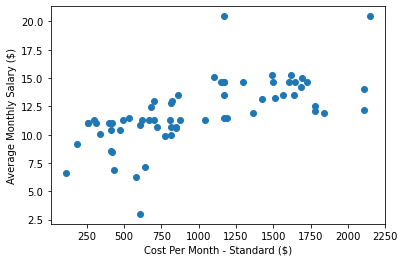

In [24]:
plt.xlabel('Cost Per Month - Standard ($)')
plt.ylabel('Average Monthly Salary ($)')
plt.scatter((df['month_income']), df['Cost Per Month - Standard ($)'])
plt.show()

# 3.1. Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от валюты страны. 

In [25]:
df.groupby('Country')[['Cost Per Month - Basic ($)', 
                       'Cost Per Month - Standard ($)', 
                       'Cost Per Month - Premium ($)']].mean()

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
Country,,,
Argentina,3.74,6.30,9.26
Australia,7.84,12.12,16.39
Austria,9.03,14.67,20.32
Belgium,10.16,15.24,20.32
Bolivia,7.99,10.99,13.99
...,...,...,...
Ukraine,5.64,8.46,11.29
United Kingdom,7.91,13.20,18.48
United States,8.99,13.99,17.99


In [26]:
df.columns

Index(['Country_code', 'Country', 'Total Library Size', 'No. of TV Shows',
       'No. of Movies', 'Cost Per Month - Basic ($)',
       'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)',
       'continent', 'month_income'],
      dtype='object')

# 3.2. Какая средняя цена подписки, (базовой, стандартной, премиум) в зависимости от континента


In [27]:
df.groupby('continent')\
    [['Cost Per Month - Basic ($)', 'Cost Per Month - Standard ($)', 'Cost Per Month - Premium ($)']].mean()

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
continent,,,
Africa,6.260000,10.050000,12.580000
Americas,7.223750,10.465625,13.548750
Asia,7.636667,10.404167,12.966667
Europe,9.230294,13.304412,17.545588
Oceania,8.320000,12.325000,16.665000


# 3.3. Сколько стоит подписка относительно среднего дохода (базовая, стандартная, премиум) в Чехии?

In [28]:
df[df['Country'] == 'Czechia']\
    [['Cost Per Month - Basic ($)', 
      'Cost Per Month - Standard ($)', 
      'Cost Per Month - Premium ($)']] / df[df['Country'] == 'Czechia']['month_income'].values[0]

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
12,0.007528,0.009796,0.012064


# 3.4. Какие топ-5 стран имеют самую большую доступную коллекцию сериалов?

<h2 style="color:red">
   Сериалы — это TV Shows. Total Library Size — это сериалы + фильмы
</h2>

In [29]:
df.sort_values(by='Total Library Size', 
               ascending=False, 
               ignore_index=True).head()[['Country', 'Total Library Size']]

,Country,Total Library Size
0,Czechia,7325
1,Slovakia,7035
2,Hungary,6884
3,Bulgaria,6797
4,United Kingdom,6643


# 3.5. Какой процент среднего дохода россиянина будет составлять подписка Netflix?


In [30]:
df[df['Country'] == 'Russia']\
    [['Cost Per Month - Basic ($)', 
      'Cost Per Month - Standard ($)', 
      'Cost Per Month - Premium ($)']]  / df[df['Country'] == 'Russia']['month_income'].values[0] * 100

,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
48,1.341031,1.788041,2.236701


# 3.6. На каком месте будет Россия, если отсортировать страны по эффективности подписки (Cost Per Title)


In [31]:
df['Cost Per Title'] = df[['Cost Per Month - Basic ($)',
                             'Cost Per Month - Standard ($)',
                             'Cost Per Month - Premium ($)']].mean(axis=1)  / df['Total Library Size']
df[['Country', 'Cost Per Title']].sort_values(by='Cost Per Title', 
                                              ignore_index=True).query("Country == 'Russia'").index.values[0]

18

# 3.7. В какой стране лучше всего брать VPN для того, чтобы платить за Netflix меньше всего?


In [32]:
min_cost = df['Cost Per Month - Basic ($)'].min()
df[df['Cost Per Month - Basic ($)'] == min_cost][['Country', 
                                                  'Cost Per Month - Basic ($)', 
                                                  'Cost Per Month - Standard ($)', 
                                                  'Cost Per Month - Premium ($)']]

,Country,Cost Per Month - Basic ($),Cost Per Month - Standard ($),Cost Per Month - Premium ($)
59,Turkey,1.97,3.0,4.02
